<a href="https://colab.research.google.com/github/DesireeHc/EcuacionesDiferenciales/blob/main/Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de ecuaciones diferenciales

Esta notebook muestra la manera de resolver sistemas de ecuaciones diferenciales en python con matrices.
Para la primera parte hemos desarrollado las soluciones de **sistemas de ecuaciones diferenciales lineales**, y consta de la definición del sistema y de la matriz para este tipo de ecuaciones, se define la gráfica, se obtiene el discriminate a través de la traza y el determinante que están definidos en la librería ***  y finalmente se obtiene la clasificación del sistema y la región en la que se encuentra de acuerdo a los puntos degenerados.   

La segunda parte muiestra los resultados para el caso de sistemas de ecuaciones diferenciales lineales no homogéneos.

Y para la tercera parte tenemos los sistemas de ecuaciones diferenciales no lineales.

In [ ]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

In [ ]:
a,b,c,d=1, 1, -1, 2
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos

In [ ]:
 A=sym.Matrix([[a,b],[c,d]]) #definimos a la matriz

In [ ]:
# Trayectorias.
#Definimos a las graficas como una función
def grafica(dx_dt):
    ts = np.linspace(0,-4,100) #se crea un arreglo de 100 "puntos de tiempo" igualmente espaciados entre el 0 y el -4
    ic = np.linspace(-1,1,5) #crea un arreglo de 5 valores iniciales entre el -1 y el 1, crea una malla de condiciones iniciales de las dos variables iniciales
    for r in ic: #r=-1
        for s in ic: #s=1
            x0 = [r, s] #crea los valores iniciales de ambas variables
            xs = odeint(dx_dt, x0, ts) #odeint resuelve el sistema con la condición inicial x0  para los puntos de ts
            plt.plot(xs[:,0], xs[:,1], "r-") #grafica la trayectoria de la solución


    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.tick_params(labelsize=8) #dan los nombres de la gráfica y el tamaño
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)#los limites para graficar

    X,Y = np.mgrid[-1:1:10j, -1:1:10j] #crea dos mallas de puntos que van de -1 a 1, y contiene 10 flechas
    u = a*X + b*Y #calcula las componentes en x del campo vectorial en cada punto de la malla
    v = c*X + d*Y
    pl.quiver(X, Y, u, v, color = 'b') #grafica el campo vectorial
    plt.show() #muestra la gráfica

In [ ]:
def D(A):
    return A.trace()**2-4*A.det()  #Definimos al discriminante

In [ ]:
def tipo(A):
    t=A.trace()
    d=A.det()
    grafica(dx_dt)
    if t>0 and d>0 and D(A)>0:
        print("El punto fijo pertence a la Región I")
    elif t>0 and d>0 and D(A)<0:
        print("El punto fijo pertence a la Región II")
   # elif t<0 and d>0 and D(A)<0:
    #    print("El punto fijo pertence a la Región III")
    #elif t<0 and d>0 and D(A)>0:
     #   print("El punto fijo pertence a la Región IV")
    elif d<0:
        print("El punto fijo pertence a la Región V")
    elif D(A)==0:
        print("El punto fijo es degenerado")

In [ ]:
def clas(A):
    t=A.trace()
    d=A.det()
    if t<0 and d>0:
      if D(A)<0:
        print("El punto fijo pertenece a la región III, es estable y atractivo")
      if D(A)>0:
        print("El punto fijo pertenece a la región IV, es estable y atractivo")
    elif t<=0 and d>0:
        print("El punto fijo es estable")
    elif t>0 and d<0:
        print("El punto fijo es inestable")
    else:
        print("No  tiene clasificación")

-10
1
41


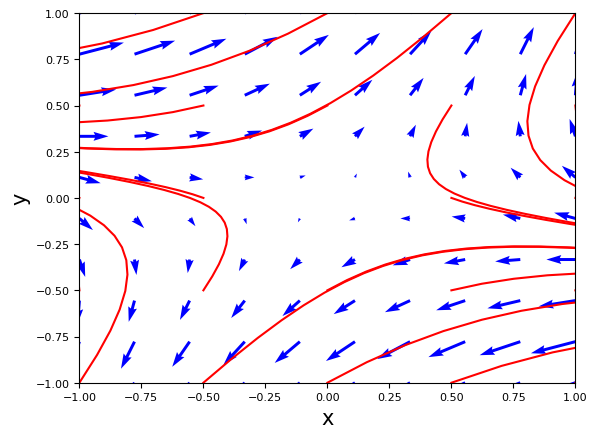

El punto fijo pertence a la Región V
El punto fijo es inestable


(None, None)

In [ ]:
print(A.det())
print(A.trace())
print(D(A))

tipo(A), clas(A)


Ejemplos para cada región:

In [ ]:
#Región I
a,b,c,d=2, 1, 1, 2
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

In [ ]:
print(A.det())
print(A.trace())
print(D(A))

3
4
4


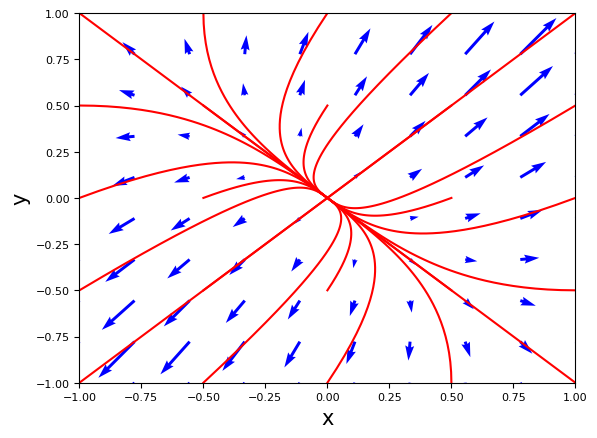

El punto fijo pertence a la Región I
No  tiene clasificación


(None, None)

In [ ]:
tipo(A), clas(A)

In [ ]:
#Región II
a,b,c,d= 1, -1, 1, 1
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

In [ ]:
print(A.det())
print(A.trace())
print(D(A))

2
2
-4


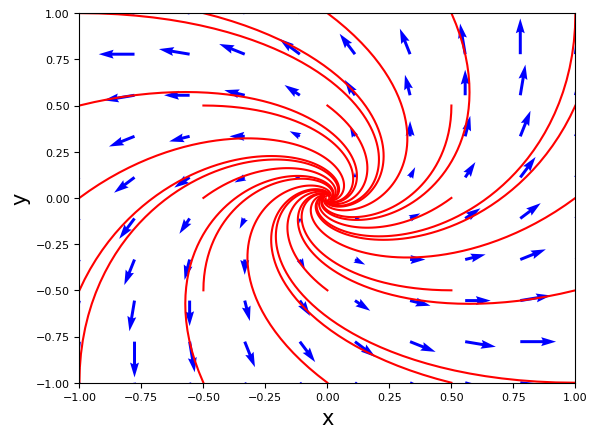

El punto fijo pertence a la Región II
No  tiene clasificación


(None, None)

In [ ]:
tipo(A), clas(A)

In [ ]:
#Región III
a,b,c,d= -1, -2, 1, -1
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

In [ ]:
print(A.det())
print(A.trace())
print(D(A))

3
-2
-8


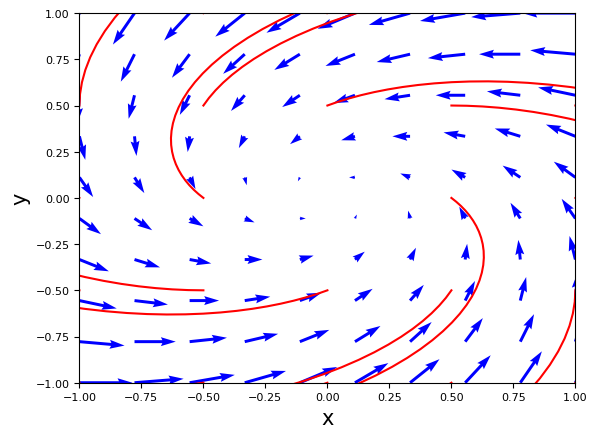

El punto fijo pertenece a la región III, es estable y atractivo


(None, None)

In [ ]:
tipo(A), clas(A)

8
-6
4


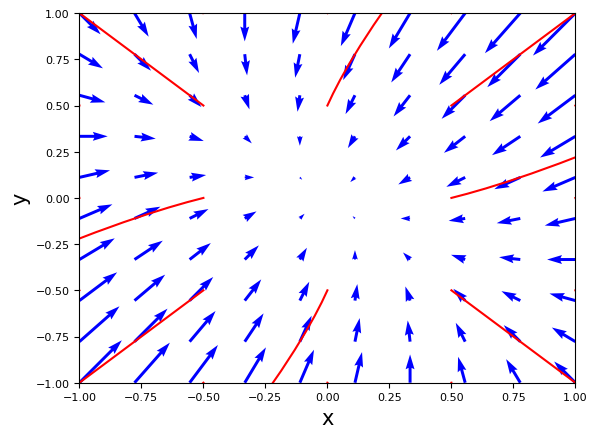

El punto fijo pertenece a la región IV, es estable y atractivo


(None, None)

In [ ]:
#Región IV
a,b,c,d=-3, -1, -1, -3
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

print(A.det())
print(A.trace())
print(D(A))

tipo(A), clas(A)

-10
1
41


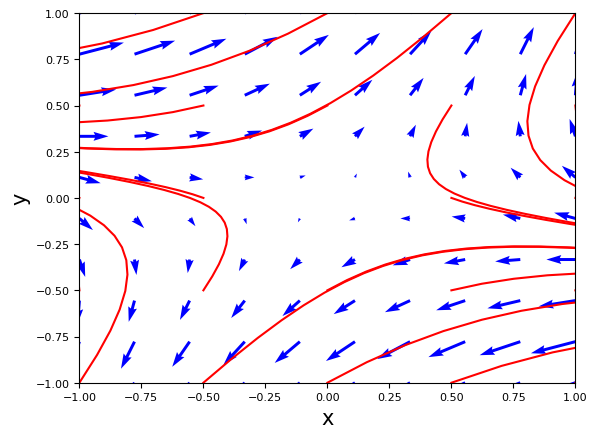

El punto fijo pertence a la Región V
El punto fijo es inestable


(None, None)

In [ ]:
#Región V
a,b,c,d= -2, 4, 1, 3
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

print(A.det())
print(A.trace())
print(D(A))

tipo(A), clas(A)

#Sistemas de ecuaciones diferenciales lineales y no homogéneas

In [2]:
import numpy as np

In [3]:
A = np.array([[2, 3, -1], [1, -2, 4], [3, 1, 2]])
b = np.array([5, -2, 1])
x = np.array([0, 0, 0])

In [4]:
def pivoteo_parcial(A, b):
  """
  Función para realizar pivoteo parcial en una matriz y vector.

  Args:
    A: Matriz de coeficientes del sistema de ecuaciones.
    b: Vector de términos independientes.

  Returns:
    A_piv: Matriz de coeficientes con pivoteo aplicado.
    b_piv: Vector de términos independientes con pivoteo aplicado.
  """
  n = A.shape[0]
  for i in range(n):
    # Encontrar el mayor elemento de la columna i por debajo de la diagonal i.
    mayor = np.abs(A[i:, i]).argmax() + i
    if i != mayor:
      # Intercambiar filas i y mayor.
      A[[i, mayor], :] = A[[mayor, i], :]
      b[[i, mayor]] = b[[mayor, i]]

  return A, b

A_piv, b_piv = pivoteo_parcial(A.copy(), b.copy())

In [5]:
def eliminacion_gaussiana(A_piv, b_piv):
  """
  Función para realizar eliminación gaussiana en una matriz y vector.

  Args:
    A_piv: Matriz de coeficientes con pivoteo aplicado.
    b_piv: Vector de términos independientes con pivoteo aplicado.

  Returns:
    R: Matriz triangular superior.
    x: Vector de soluciones.
  """
  n = A_piv.shape[0]
  R = A_piv.copy()

  for i in range(n - 1):
    pivote = R[i + 1:, i] / R[i, i]
    R[i + 1:, :] -= pivote[:, np.newaxis] * R[i, :]
    b_piv[i + 1:] -= pivote * b_piv[i]

  # Resolución del sistema triangular superior.
  x = np.zeros(n)
  for i in range(n - 1, -1, -1):
    x[i] = (b_piv[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]

  return R, x

R, x = eliminacion_gaussiana(A_piv, b_piv)

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [6]:
print("Solución del sistema:")
print(x)

Solución del sistema:
[0 0 0]


#Sistemas de ecuaciones diferenciales no lineales